In [56]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet


In [2]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\basak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\basak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\basak\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
#!kaggle datasets download -d shivamkushwaha/bbc-full-text-document-classification


In [57]:
df = pd.read_csv("bbc_text_cls.csv")

In [58]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [80]:
inputs = df['text'].astype(str)
labels = df['labels'].astype(str)

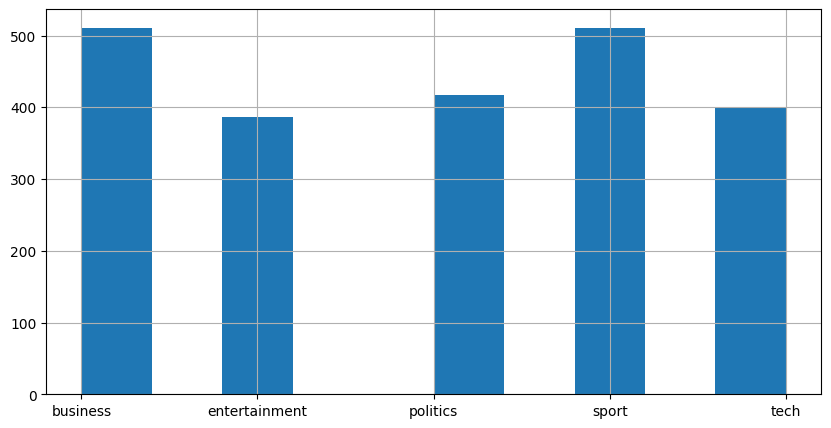

In [81]:
labels.hist(figsize=(10,5));

In [96]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, random_state=4)

In [97]:
vectorizer = CountVectorizer()

In [98]:
x_train = vectorizer.fit_transform(inputs_train)
x_test = vectorizer.transform(inputs_test)

In [99]:
x_train

<1780x26863 sparse matrix of type '<class 'numpy.int64'>'
	with 359104 stored elements in Compressed Sparse Row format>

In [100]:
(x_train != 0).sum()

359104

In [101]:
#Non-zero percentage of values
(x_train != 0).sum() / np.prod(x_train.shape)  #sparse (product-prod)

0.007510100146101296

In [105]:
model = MultinomialNB()
model.fit(x_train, labels_train)
print("Accuracy: ", model.score(x_test, labels_test))
print("Accuracy: ", model.score(x_train, labels_train))
   

Accuracy:  0.9775280898876404
Accuracy:  0.9938202247191011


In [107]:
#with  stopwords
vectorizer = CountVectorizer(stop_words='english', lowercase=False)
x_train = vectorizer.fit_transform(inputs_train)
x_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(x_train, labels_train)
print("Accuracy: ", model.score(x_test, labels_test))
print("Accuracy: ", model.score(x_train, labels_train))

Accuracy:  0.9775280898876404
Accuracy:  0.994943820224719


In [ ]:
print(X_train.shape)

In [109]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [110]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [111]:
#with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X_train = vectorizer.fit_transform(inputs_train)    
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, labels_train)
print("Accuracy: ", model.score(X_test, labels_test))
print("Accuracy: ", model.score(X_train, labels_train))

Accuracy:  0.9797752808988764
Accuracy:  0.9921348314606742


In [113]:
print(X_train.shape)

(1780, 28627)


In [112]:
class StemTokenizer:
    def __init__(self):
        self.stemmer = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.stemmer.stem(token) for token in tokens]

In [114]:
#with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, labels_train)
print("Accuracy: ", model.score(X_test, labels_test))
print("Accuracy: ", model.score(X_train, labels_train))
    

Accuracy:  0.9775280898876404
Accuracy:  0.9910112359550561


In [115]:
print(X_train.shape)

(1780, 23303)


In [116]:
def simple_tokenizer(s):
    return s.split()

In [117]:
#string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, labels_train)
print("Accuracy: ", model.score(X_test, labels_test))
print("Accuracy: ", model.score(X_train, labels_train))


Accuracy:  0.9730337078651685
Accuracy:  0.994943820224719


In [118]:
print(X_train.shape)

(1780, 53574)
